In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

#### $[1 \  X]$ Example

Initial Matrix: [[ 1 73]
 [ 1 69]
 [ 1 40]
 [ 1 74]
 [ 1 16]
 [ 1 36]
 [ 1  9]
 [ 1 38]
 [ 1 92]
 [ 1 93]] 



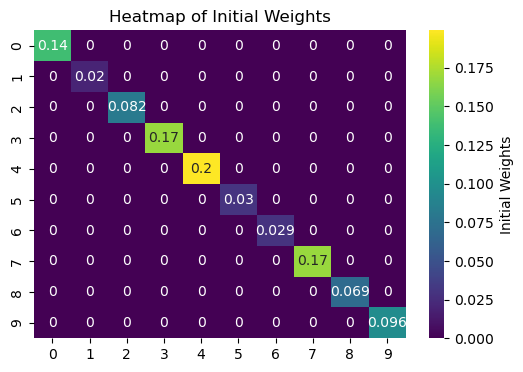

Iteration 1: max index = 6, max d_value = 3.521057284627215, alpha_i = 0.3016705121899147
Iteration 2: max index = 9, max d_value = 3.917540747436247, alpha_i = 0.3286227877230613
Iteration 3: max index = 6, max d_value = 2.853662124791029, alpha_i = 0.23026368003480296
Iteration 4: max index = 9, max d_value = 2.5708949355114386, alpha_i = 0.18171009486562875
Iteration 5: max index = 6, max d_value = 2.4330330999258507, alpha_i = 0.15108970614435113
Iteration 6: max index = 9, max d_value = 2.3502782421912265, alpha_i = 0.12970594920599338
Iteration 7: max index = 6, max d_value = 2.2947448513987023, alpha_i = 0.11382352711435456
Iteration 8: max index = 9, max d_value = 2.2547589832923682, alpha_i = 0.10151709877537791
Iteration 9: max index = 6, max d_value = 2.2245274289813204, alpha_i = 0.09167921586211583
Iteration 10: max index = 9, max d_value = 2.2008344093419243, alpha_i = 0.0836228574812345
Iteration 11: max index = 6, max d_value = 2.1817460336010623, alpha_i = 0.0768972471

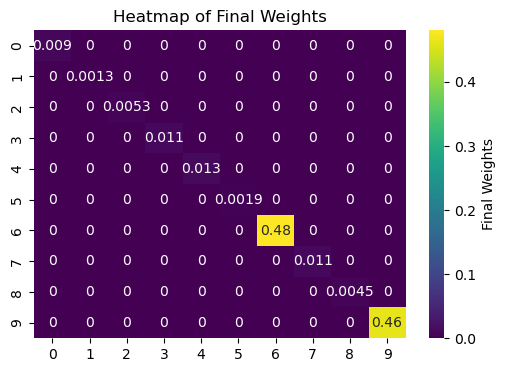

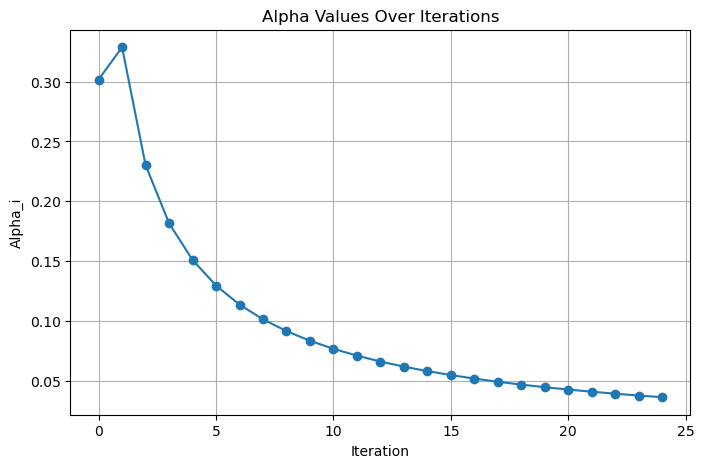

In [2]:
# Constants and parameters
num_points = 10  # Number of design points
num_iterations = 25  # Number of iterations
p = 2  # Degree of polynomial + 1

# Generate Matrix
X = np.random.randint(1, 101, size=num_points)
n = X.shape[0]
columns = [np.ones(n, dtype=np.int_)]
for d in range(1, p):
    columns.append(X**d)
X = np.column_stack(columns)

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_points)
weights = np.diag(initial_weights / np.sum(initial_weights))  # Create a diagonal matrix of weights
print(f"Initial Matrix: {X} \n")

# Plot initial weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=True, cmap='viridis', cbar_kws={'label': 'Initial Weights'})
plt.title('Heatmap of Initial Weights')
plt.show()

alpha_history = []

# Iteration
for i in range(num_iterations):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    M_inv = np.linalg.inv(M) if np.linalg.det(M) != 0 else None

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - p) / (p * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    print(f"Iteration {i+1}: max index = {max_index}, max d_value = {d_xi}, alpha_i = {alpha_i}")

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight  # Add the recalculated weight to x_i
    weights = new_weights  # Update Xi_n for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved.")
        break

# Output the final weights and design points
# print("Final design points:", X)
# print("Final weights matrix:", weights)

# Plot final weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=True, cmap='viridis', cbar_kws={'label': 'Final Weights'})
plt.title('Heatmap of Final Weights')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(8, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()


#### $[1 \  X \ X^2]$ Example
> Note: Essentially the same as the last example as it effectively assigns weights to the extreme points through iterations and $X^2$ doesn't change the monotonicity of $X$

Initial Matrix: [[   1   98 9604]
 [   1   14  196]
 [   1   75 5625]
 [   1   61 3721]
 [   1   61 3721]
 [   1   97 9409]
 [   1    1    1]
 [   1   46 2116]
 [   1    1    1]
 [   1   96 9216]] 



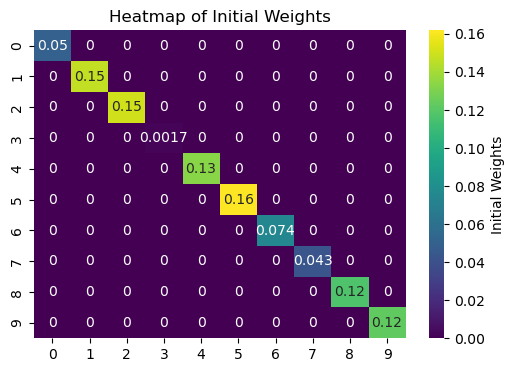

Iteration 1: max index = 6, max d_value = 4.001209060104764, alpha_i = 0.11120063503893489
Iteration 2: max index = 7, max d_value = 4.366777352843263, alpha_i = 0.13532004145240073
Iteration 3: max index = 0, max d_value = 3.969325753169291, alpha_i = 0.10881547234920107
Iteration 4: max index = 6, max d_value = 3.8825505165235943, alpha_i = 0.1020566695436981
Iteration 5: max index = 7, max d_value = 3.6971086185879165, alpha_i = 0.0861550543155224
Iteration 6: max index = 0, max d_value = 3.6252069359899055, alpha_i = 0.07938509880481152
Iteration 7: max index = 6, max d_value = 3.5631403557158285, alpha_i = 0.07323572877570803
Iteration 8: max index = 7, max d_value = 3.498281098184074, alpha_i = 0.06648319098896435
Iteration 9: max index = 0, max d_value = 3.4550614136936977, alpha_i = 0.06178547593629536
Iteration 10: max index = 6, max d_value = 3.4241222027448606, alpha_i = 0.05831969503086138
Iteration 11: max index = 7, max d_value = 3.3873396927143875, alpha_i = 0.0540824715

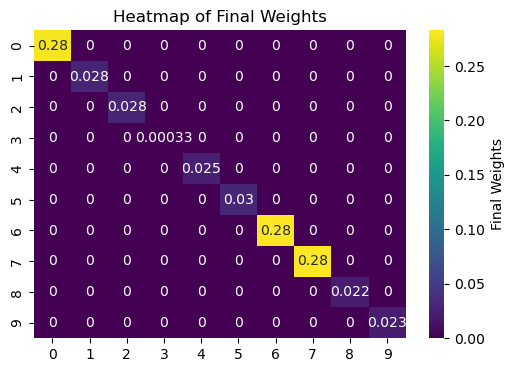

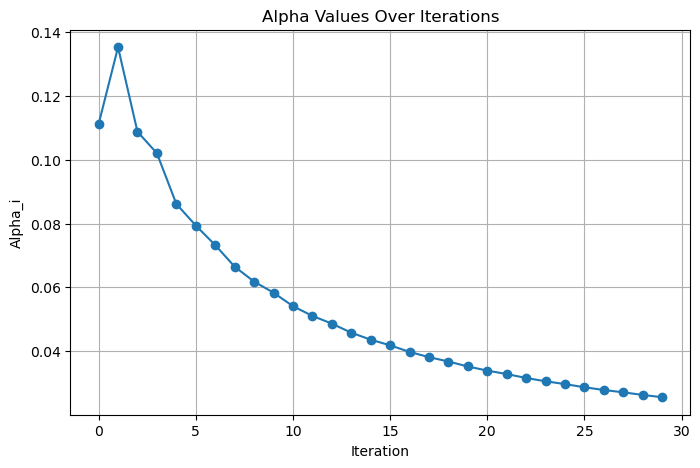

In [3]:
# Constants and parameters
num_points = 10  # Number of design points
num_iterations = 30  # Number of iterations
p = 3  # Degree of polynomial + 1

# Generate Matrix
X = np.random.randint(1, 101, size=num_points)
n = X.shape[0]
columns = [np.ones(n, dtype=np.int_)]
for d in range(1, p):
    columns.append(X**d)
X = np.column_stack(columns)

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_points)
weights = np.diag(initial_weights / np.sum(initial_weights))  # Create a diagonal matrix of weights
print(f"Initial Matrix: {X} \n")
# print(f"Initial Weights Matrix: {weights}\n")

# Plot initial weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=True, cmap='viridis', cbar_kws={'label': 'Initial Weights'})
plt.title('Heatmap of Initial Weights')
plt.show()

alpha_history = []

# Iteration
for i in range(num_iterations):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    M_inv = np.linalg.inv(M) if np.linalg.det(M) != 0 else None

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - p) / (p * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    print(f"Iteration {i+1}: max index = {max_index}, max d_value = {d_xi}, alpha_i = {alpha_i}")

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight  # Add the recalculated weight to x_i
    weights = new_weights  # Update Xi_n for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved.")
        break

# Output the final weights and design points
# print("Final design points:", X)
# print("Final weights matrix:", weights)

# Plot final weights heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=True, cmap='viridis', cbar_kws={'label': 'Final Weights'})
plt.title('Heatmap of Final Weights')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(8, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()


#### $[1 \quad  X_1 \quad  X_2 \quad  X_1^2 \quad  X_2^2 \quad  X_1X_2]$ Example

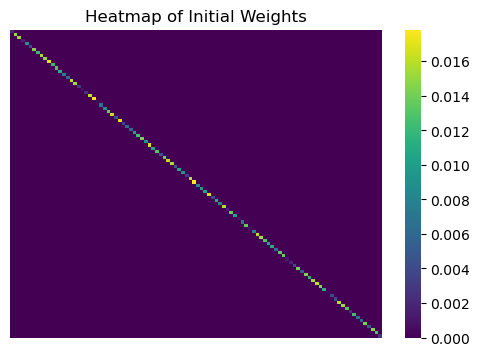

Optimizing:   0%|          | 0/100 [00:00<?, ?it/s]

Convergence achieved after 76 iterations.


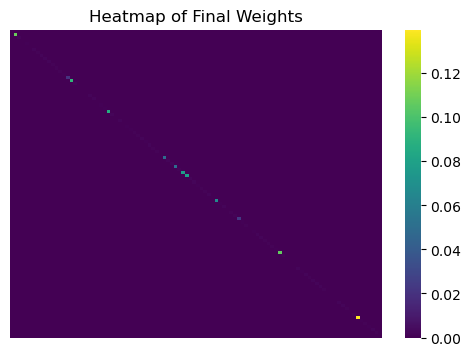

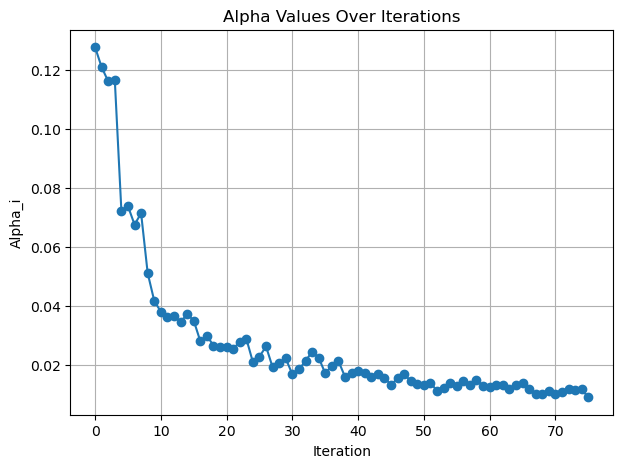

Standout weights (significantly above average) and their indices:
Index: 1, Weight: 0.1077
Index: 16, Weight: 0.0920
Index: 26, Weight: 0.0865
Index: 46, Weight: 0.0779
Index: 47, Weight: 0.0795
Index: 55, Weight: 0.0663
Index: 72, Weight: 0.1060
Index: 93, Weight: 0.1396


In [4]:
# Constants and parameters
num_obs = 100 # Number of observations
X1 = np.random.randint(1, 10, size=num_obs)  # First predictor
X2 = np.random.randint(1, 10, size=num_obs)  # Second predictor
num_iterations = 100  # Number of iterations

# Create a design matrix with interaction and quadratic terms
X = np.column_stack([np.ones(num_obs, dtype=np.int_), X1, X2, X1**2, X2**2, X1*X2])

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_obs)
weights = np.diag(initial_weights / np.sum(initial_weights))

# Visualize the initial weights
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=False, cmap='viridis')
plt.title('Heatmap of Initial Weights')
plt.axis('off')
plt.show()

alpha_history = []

# Iteration with a progress bar
for i in tqdm(range(num_iterations), desc='Optimizing'):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    if np.linalg.det(M) == 0:
        print("Matrix M is singular at iteration", i)
        break
    M_inv = np.linalg.inv(M)

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - X.shape[1]) / (X.shape[1] * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    if alpha_i < 0 or alpha_i > 1:  # Sanity check for alpha
        print("Alpha out of bounds:", alpha_i, "at iteration", i)
        break

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight
    weights = new_weights  # Update weights for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved after", i+1, "iterations.")
        break

# Visualize the final weights
plt.figure(figsize=(6, 4))
sns.heatmap(weights, annot=False, cmap='viridis')
plt.title('Heatmap of Final Weights')
plt.axis('off')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(7, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()

# Analyze and print standout weights along with their locations
final_weights = np.diag(weights)
average_weight = np.mean(final_weights)
standout_threshold = average_weight + 2 * np.std(final_weights)
standout_indices = np.where(final_weights > standout_threshold)[0]  # Get indices of standout weights
standout_weights = final_weights[standout_indices]  # Get the standout weights using indices

print("Standout weights (significantly above average) and their indices:")
for index, weight in zip(standout_indices, standout_weights):
    print(f"Index: {index}, Weight: {weight:.4f}")

